# import libraries

In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy

In [4]:
#Import high activity customer data frame 
hac = pd.read_pickle(r'/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/High_activity_customers.pkl')

In [5]:
#import department data frame 
dept = pd.read_csv(r'/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/departments_wrangled.csv', index_col= False)

In [6]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Rename 'Unnamed: 0' to 'department_id'
dept = dept.rename(columns={'Unnamed: 0': 'department_id'})

# merge table to to run further comparisions 

In [9]:
merged=hac.merge(dept, on= 'department_id', how= 'left', indicator= 'done')

In [10]:
#check to see if i got a complete merge
merged['done'].value_counts()

done
both          29303281
left_only            0
right_only           0
Name: count, dtype: int64

In [11]:
#display all columns as rows 
pd.options.display.max_rows = None
pd.options.display.max_columns = None 

In [12]:
#view new merged data frame 
merged.head()

,user_id,Gender,State,Age,Date Joined,number of dependants,Family Status,Income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,region,activity_flag,department,done
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,dairy eggs,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,dairy eggs,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,both,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,produce,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,produce,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Busiest day,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,dairy eggs,both


In [13]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
merged.columns

Index(['user_id', 'Gender', 'State', 'Age', 'Date Joined',
       'number of dependants', 'Family Status', 'Income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'match', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'region', 'activity_flag', 'department',
       'done'],
      dtype='object')

# Orders by department 

In [16]:
# Group by 'department' and count the number of orders
department_orders = merged['department'].value_counts()

In [17]:
department_orders

department
produce            8608701
dairy eggs         4909353
snacks             2620533
beverages          2437586
frozen             1996444
pantry             1681391
bakery             1060612
canned goods        954449
deli                947553
dry goods pasta     773993
household           658975
meat seafood        637276
breakfast           633469
personal care       399739
babies              391707
international       240869
alcohol             134867
pets                 87805
missing              63389
other                32572
bulk                 31998
Name: count, dtype: int64

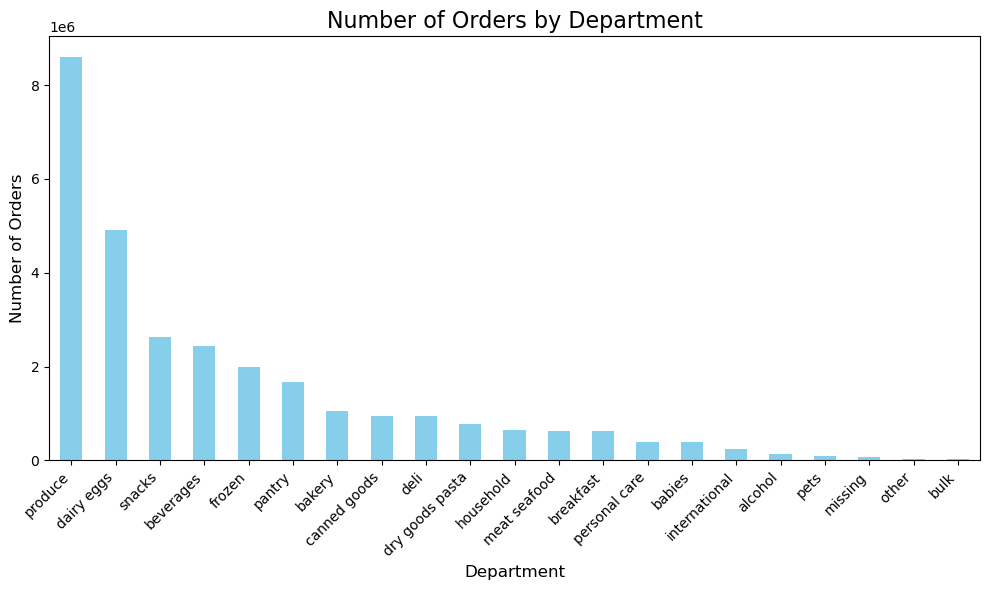

In [18]:
# Plotting the department orders
dept_orders=plt.figure(figsize=(10, 6))
department_orders.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.tight_layout()
plt.show()

In [19]:
#Export Orders by Department Bar chart
dept_orders.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/orders_by_dept.png')

In [20]:
# creating age flag 
merged.loc[merged['Age'] <= 25, 'Age_group'] = 'Young adult'
merged.loc[(merged['Age'] > 25) & (merged['Age'] <= 44), 'Age_group'] = 'Adult'
merged.loc[(merged['Age'] > 44) & (merged['Age'] <= 64), 'Age_group'] = 'Middle-aged'
merged.loc[merged['Age'] > 64, 'Age_group'] = 'Senior'

In [21]:
merged['Age_group'].value_counts(dropna = False)

Age_group
Middle-aged    9169173
Adult          8722963
Senior         7754560
Young adult    3656585
Name: count, dtype: int64

In [22]:
# Create an income group flag
merged.loc[merged['Income'] <= 55000, 'income_group'] = 'low-income'
merged.loc[(merged['Income'] > 55000) & (merged['Income'] <= 150000), 'income_group'] = 'middle-income'
merged.loc[merged['Income'] > 150000, 'income_group'] = 'high-income'

In [23]:
merged['income_group'].value_counts(dropna = False)

income_group
middle-income    21414125
low-income        4199182
high-income       3689974
Name: count, dtype: int64

In [24]:
# Create a dependents flag
merged.loc[merged['number of dependants'] == 0, 'dependants_flag'] = 'no dependants'
merged.loc[merged['number of dependants'] >= 1, 'dependants_flag'] = 'has dependants'

In [25]:
merged['dependants_flag'].value_counts(dropna = False)

dependants_flag
has dependants    21978394
no dependants      7324887
Name: count, dtype: int64

In [26]:
result = []
for value in merged['State']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [27]:
#Assigning the values in result[] to new column Region
merged['region']=result

In [28]:
merged['region'].value_counts()

region
South        9756873
West         7505128
Midwest      6868419
Northeast    5172861
Name: count, dtype: int64

# Age group vs Department

In [30]:
# Create a crosstab between Age Group and Department
age_dept_crosstab = pd.crosstab(merged['Age_group'], merged['department'], dropna=False)

In [31]:
age_dept_crosstab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Age_group,,,,,,,,,,,,,,,,,,,,,
Adult,39356,117616,316398,715416,187692,9435,285522,1469819,283358,229474,587720,195440,72169,188034,18738,9626,499353,118364,25446,2572853,781134
Middle-aged,43477,124057,332119,772033,199565,9880,297685,1529004,296563,241816,627551,205951,75089,198140,19894,10259,527099,126930,26594,2683329,822138
Senior,34183,101291,279817,648309,165273,8564,252134,1296733,250334,204580,531180,175739,63185,171141,16549,8464,445398,104507,23855,2283191,690133
Young adult,17851,48743,132278,301828,80939,4119,119108,613797,117298,98123,249993,81845,30426,79961,8208,4223,209541,49938,11910,1069328,327128


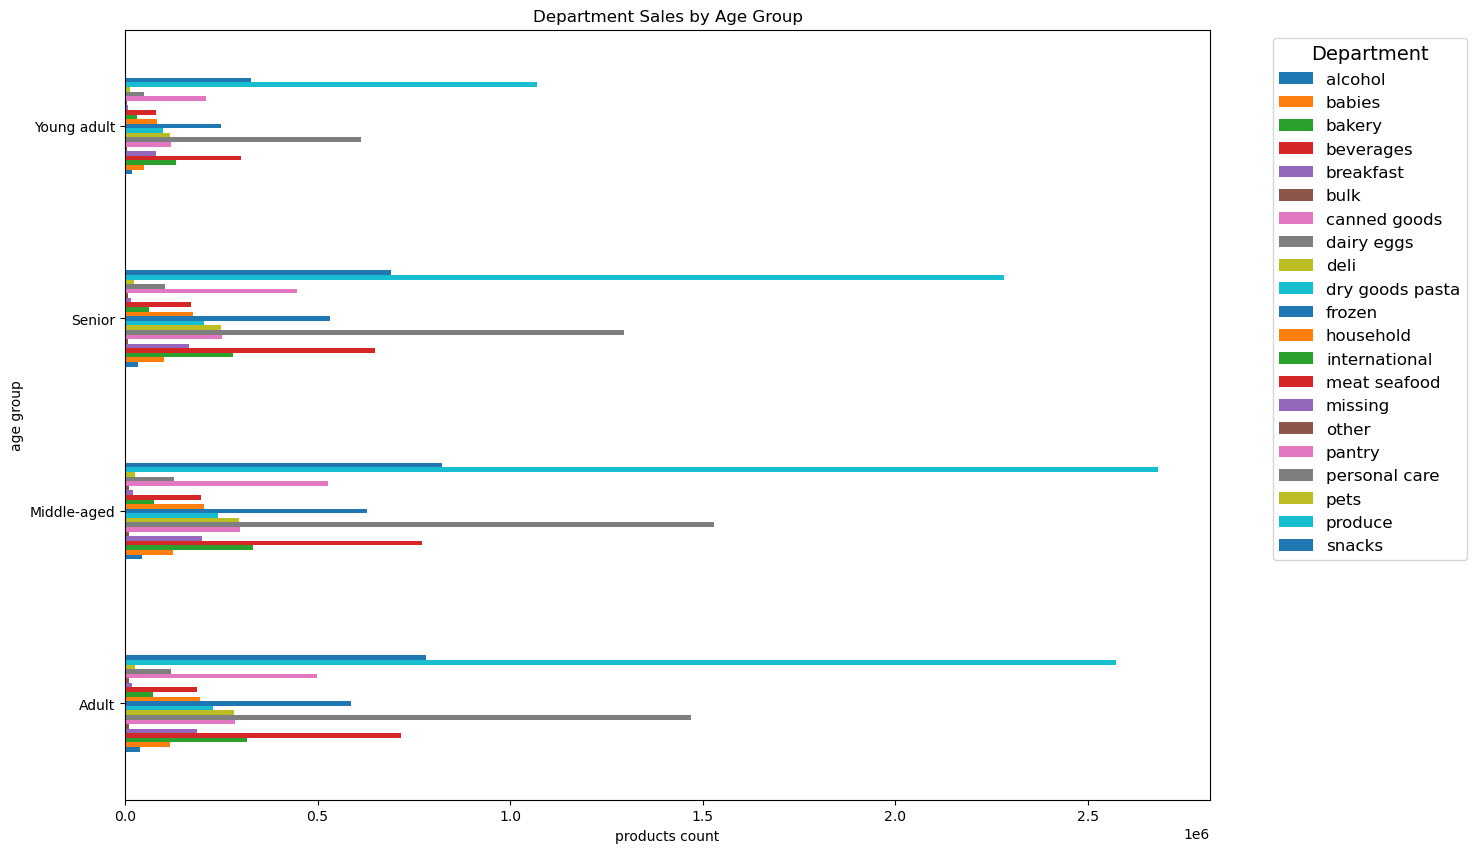

In [32]:
# Agegroup vs Department bar chart
age_dept_bar = age_dept_crosstab.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [33]:
#Export Department vs Age group Bar chart
age_dept_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/dept_vs_Age group.png')

# Order day of the week vs Income group

In [35]:
# Create a crosstab between income_group and order_day_of_week
income_order_crosstab = pd.crosstab(merged['order_day_of_week'], merged['income_group'])

In [36]:
income_order_crosstab

income_group,high-income,low-income,middle-income
order_day_of_week,,,
0,709596,667420,4191283
1,635536,817947,3672117
2,474315,587551,2752198
3,436372,529930,2512372
4,434920,519714,2487057
5,477699,583675,2768643
6,521536,492945,3030455


<Figure size 1000x600 with 0 Axes>

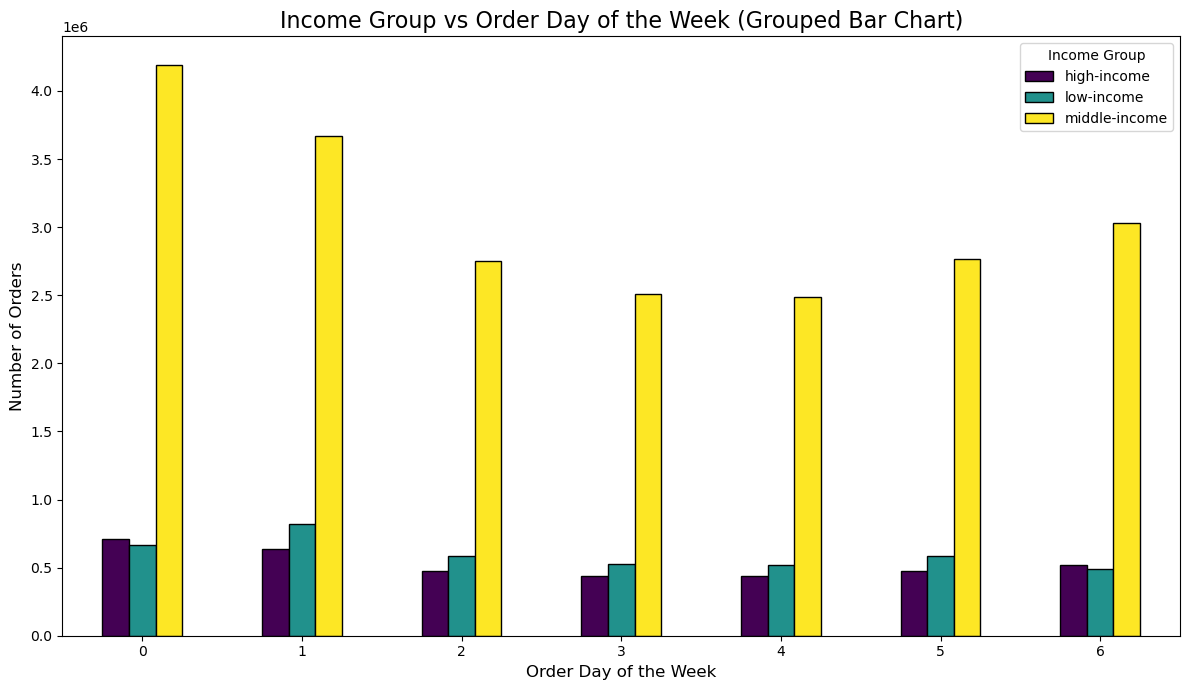

In [37]:
#order_dow_vs_income_group
Order_dow_vs_inc_group=plt.figure(figsize=(10, 6))
income_order_crosstab.plot(kind='bar', figsize=(12, 7), colormap='viridis', edgecolor='black')
plt.title('Income Group vs Order Day of the Week (Grouped Bar Chart)', fontsize=16)
plt.xlabel('Order Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

In [38]:
#Export income group vs order day of the week
Order_dow_vs_inc_group.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/dOrder_dow_vs_inc_group.bar.png')

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [40]:
# Group by 'Age_group' as customers-profile and aggregate usage frequency and expenditure
Age_group_profile_agg = merged.groupby('Age_group').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],  # Usage frequency
    'max_order': ['max', 'mean', 'min']                      # Expenditure
})

In [41]:
Age_group_profile_agg

days_since_prior_order                 max_order               
                               max       mean  min       max       mean min
Age_group                                                                  
Adult                         30.0  10.815262  0.0        99  35.261564   5
Middle-aged                   30.0  10.825714  0.0        99  35.325121   5
Senior                        30.0  10.791788  0.0        99  35.173922   5
Young adult                   30.0  10.799071  0.0        99  35.393195   5

# Income group

In [43]:
# Group by 'Income_group' as customers-profile and aggregate usage frequency and expenditure
Income_group_profile_agg = merged.groupby('income_group').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],  # Usage frequency
    'max_order': ['max', 'mean', 'min']                      # Expenditure
})

In [44]:
Income_group_profile_agg

days_since_prior_order                 max_order               
                                 max       mean  min       max       mean min
income_group                                                                 
high-income                     30.0  10.684293  0.0        99  35.677039   5
low-income                      30.0  11.132305  0.0        99  33.622806   5
middle-income                   30.0  10.768870  0.0        99  35.529276   5

# Dependant group

In [46]:
# Group by 'dependant_group' as customers-profile and aggregate usage frequency and expenditure
dependant_group_profile_agg = merged.groupby('dependants_flag').agg({
    'days_since_prior_order': ['max', 'mean', 'min'],  # Usage frequency
    'max_order': ['max', 'mean', 'min']                      # Expenditure
})

In [47]:
dependant_group_profile_agg

days_since_prior_order                 max_order             \
                                   max       mean  min       max       mean   
dependants_flag                                                               
has dependants                    30.0  10.816416  0.0        99  35.187316   
no dependants                     30.0  10.791951  0.0        99  35.536832   

                     
                min  
dependants_flag      
has dependants    5  
no dependants     5

In [48]:
# Create a subset of customer profiles and show the total price of each order
customer_profile =merged.groupby(['user_id', 'Gender', 'State', 'region', 'number of dependants', 'Family Status', 'Age_group', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [49]:
customer_profile.head()

,user_id,Gender,State,region,number of dependants,Family Status,Age_group,order_number,order_day_of_week,order_hour_of_day,loyalty_flag,dependants_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,Adult,2,3,7,New customer,has dependants,low-income,Low spender,35.4
1,1,Female,Alabama,South,3,married,Adult,3,3,12,New customer,has dependants,low-income,Low spender,28.2
2,1,Female,Alabama,South,3,married,Adult,4,4,7,New customer,has dependants,low-income,Low spender,26.0
3,1,Female,Alabama,South,3,married,Adult,5,4,15,New customer,has dependants,low-income,Low spender,57.0
4,1,Female,Alabama,South,3,married,Adult,6,2,7,New customer,has dependants,low-income,Low spender,25.0


# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [51]:
# crosstab regions vs department
region_dept_cross = pd.crosstab(merged['region'], merged['department'], dropna = False)

In [52]:
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,31765,91346,247398,567075,147308,7586,223777,1148875,221302,182168,468610,157243,57057,149257,15251,7529,396334,94724,20161,2022591,611062
Northeast,23238,69509,188722,439108,111471,5370,166884,867769,168462,135225,348200,117464,41956,111993,11256,5934,295186,70458,16792,1510525,467339
South,45585,132985,351632,814364,210569,10662,318438,1633885,314796,256831,668262,216480,79669,211671,21305,10984,557937,134139,28160,2870522,867997
West,34279,97867,272860,617039,164121,8380,245350,1258824,242993,199769,511372,167788,62187,164355,15577,8125,431934,100418,22692,2205063,674135


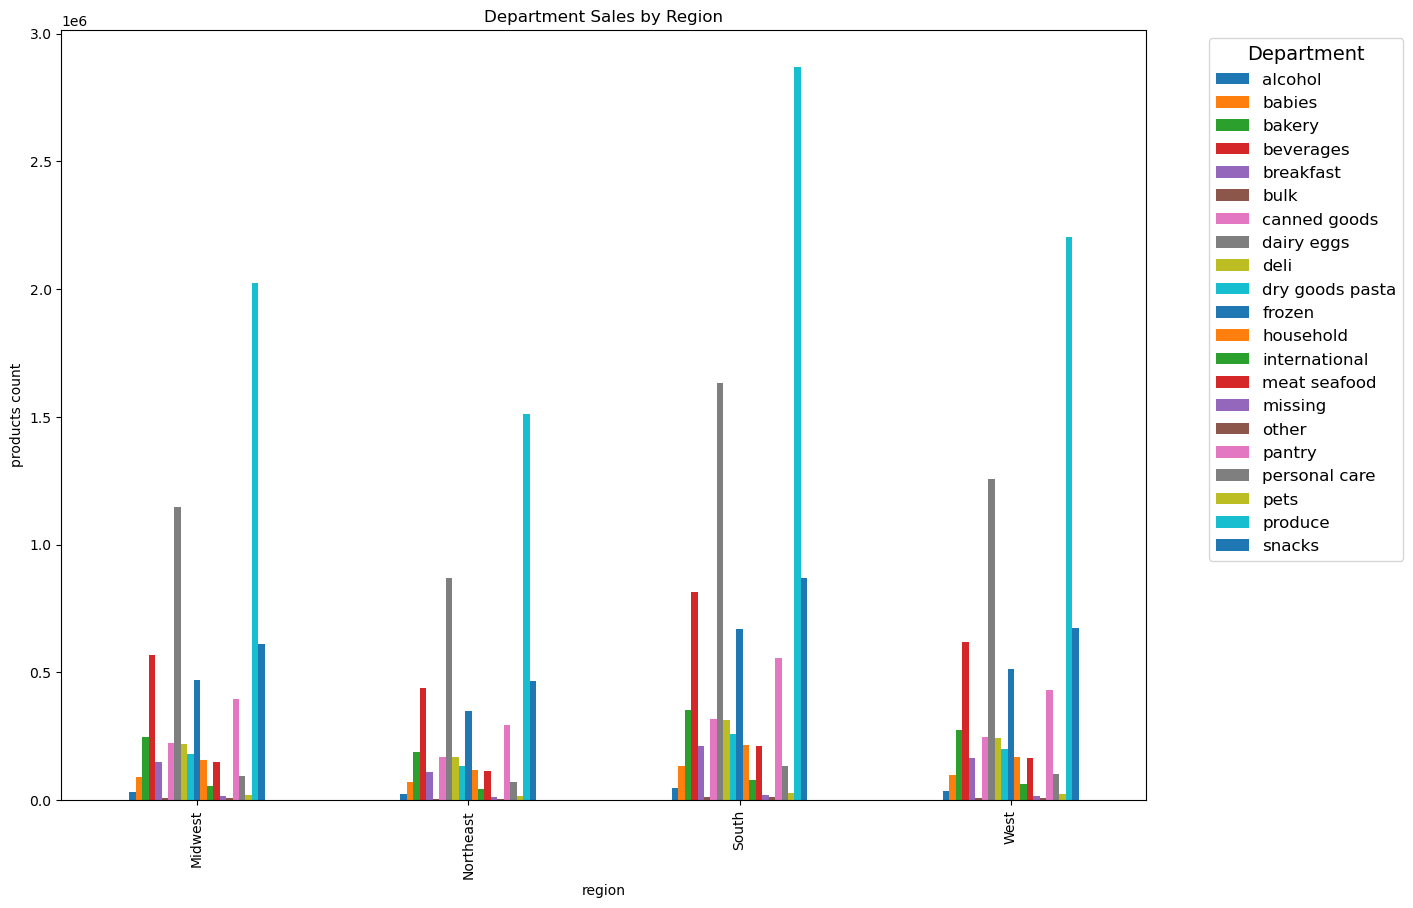

In [53]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'bar', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('region')
plt.ylabel('products count')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [54]:
#Export region vs Department Bar chart
region_dept_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/region_dept_bar.png')

Text(0.5, 0, '')

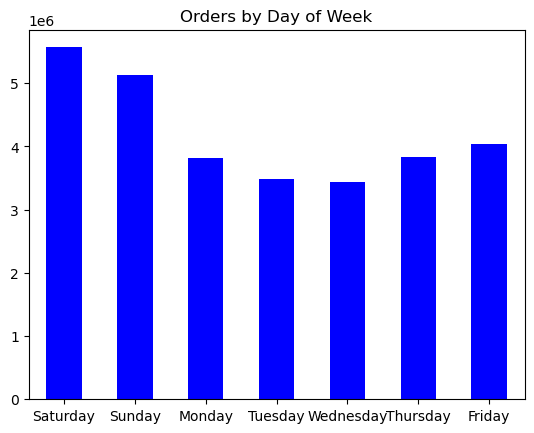

In [55]:
# bar chart orders by day of week
orders_dow_bar = merged['order_day_of_week'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [56]:
# Export bar chart
orders_dow_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/orders_dow_bar.png')

Text(0.5, 0, 'Hour of Day (24 hr clock)')

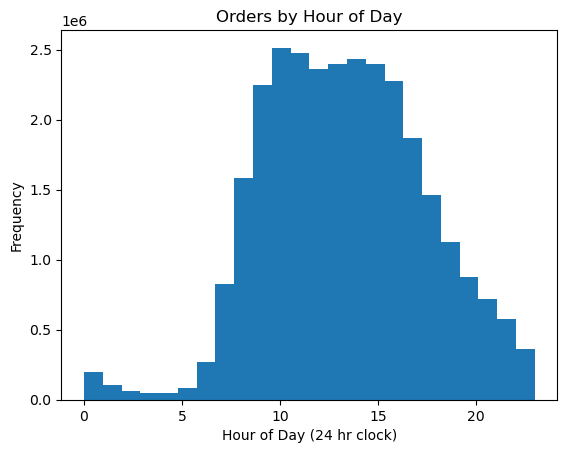

In [57]:
# histogram of hours of the day
hod_hist=merged['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [58]:
# Export histogram
hod_hist.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/hod_hist.png')

In [59]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(merged['loyalty_flag'], merged['income_group'], dropna = False)

In [60]:
loyalty_income_cross

income_group,high-income,low-income,middle-income
loyalty_flag,,,
Loyal customer,1286969,1356620,7451792
New customer,494917,685239,2946053
Regular customer,1908088,2157323,11016280


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

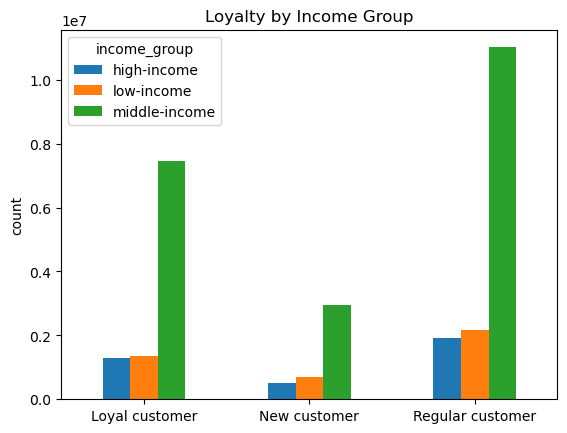

In [61]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [62]:
# Export the chart
loyalty_income_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_income_group_bar.png')

In [63]:
# Crosstab loyalty with spending
loyalty_spender_cross = pd.crosstab(merged['loyalty_flag'], merged['spending_flag'], dropna = False)

In [64]:
loyalty_spender_cross

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,211798,9883583
New customer,74169,4052040
Regular customer,284307,14797384


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

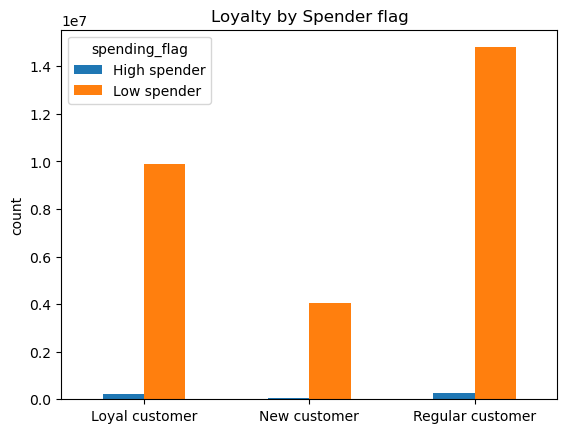

In [65]:
# bar chart
loyalty_spender_bar = loyalty_spender_cross.plot.bar()
plt.title('Loyalty by Spender flag')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [66]:
# Export the chart
loyalty_spender_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_spender_bar.png')

In [67]:
# Exclude low-activity customers from dataframe
df_filtered = merged[merged['activity_flag'] == 'high-activity customer']

In [126]:
# Cross-tabulate income group with department
product_prefs = pd.crosstab(df_filtered['department'], df_filtered['income_group'])

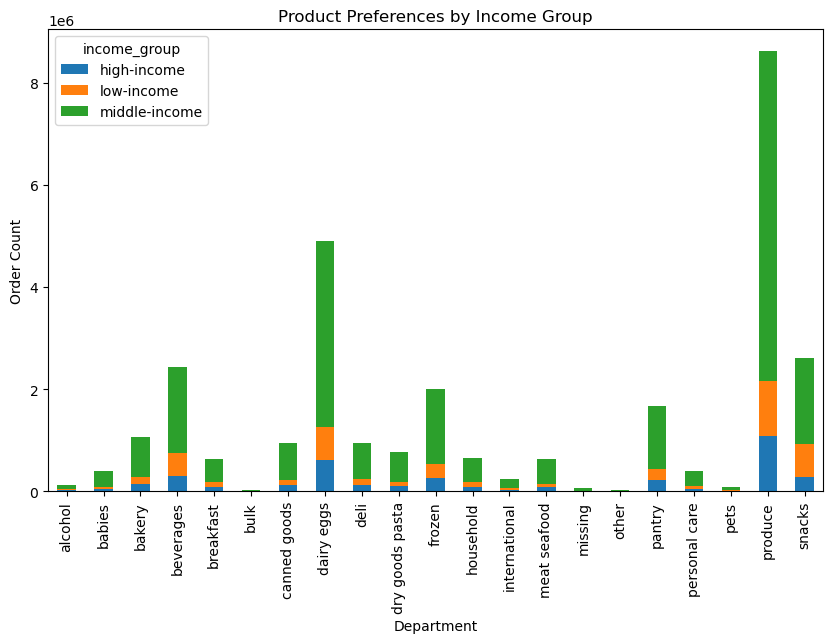

In [130]:
#bar chart
product_prefs_bar=product_prefs.plot(kind='bar', stacked=True, figsize=(10, 6), title="Product Preferences by Income Group")
plt.xlabel("Department")
plt.ylabel("Order Count")
plt.show()

In [132]:
# Export the chart
product_prefs_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/product_prefs_bar.png')